In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Library yang dibutuhkan**

In [2]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_WutheringWaves_1.csv")
df.head()

,userName,score,at,content
0,ahhafcosh Cosh,5,2024-05-23 00:45:10,Wkwkwkw kemare masuk notiv hahaha
1,Brandall Nime,5,2024-05-23 00:43:31,Ini saatnya 🥰🥰
2,Luthfy Fachrul imam,1,2024-05-23 00:40:16,Why not support Language Indonesian? Your game...
3,Dinara Safira,5,2024-05-23 00:37:26,"Dear developer, semoga game ini tidak kikir se..."
4,AlgesIrsa,5,2024-05-23 00:37:12,Panjang panjang gem baik


In [4]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Wkwkwkw kemare masuk notiv hahaha,ahhafcosh Cosh,2024-05-23 00:45:10
1,Ini saatnya 🥰🥰,Brandall Nime,2024-05-23 00:43:31
2,Why not support Language Indonesian? Your game...,Luthfy Fachrul imam,2024-05-23 00:40:16
3,"Dear developer, semoga game ini tidak kikir se...",Dinara Safira,2024-05-23 00:37:26
4,Panjang panjang gem baik,AlgesIrsa,2024-05-23 00:37:12
...,...,...,...
1388,Semoga tidak mengecewakan,Moh Rahmadani,2024-05-21 16:41:54
1389,Tolong tambah kan bahasa Indonesia,mrifai mrifai,2024-05-21 16:39:44
1390,Kalok Bosen maen/dh pensi genshin kesini aja bang,Raychal Avansha,2024-05-21 16:36:13
1391,Now force cloce my device bos..,Rai Ya,2024-05-21 16:35:11


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   1393 non-null   object
 1   userName  1393 non-null   object
 2   at        1393 non-null   object
dtypes: object(3)
memory usage: 32.8+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,1393,1393,1393
unique,1313,1388,1382
top,Game baik,Kusuma,2024-05-23 00:13:26
freq,15,2,2


# **Cleaning Data & Case Folding**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(1393, 3)

In [8]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong
df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [12]:
df.shape

(1313, 3)

In [13]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [14]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,wkwkwkw kemare masuk notiv hahaha,ahhafcosh Cosh,2024-05-23 00:45:10
1,ini saatnya,Brandall Nime,2024-05-23 00:43:31
2,why not support language indonesian your game ...,Luthfy Fachrul imam,2024-05-23 00:40:16
3,dear developer semoga game ini tidak kikir sep...,Dinara Safira,2024-05-23 00:37:26
4,panjang panjang gem baik,AlgesIrsa,2024-05-23 00:37:12
...,...,...,...
1388,semoga tidak mengecewakan,Moh Rahmadani,2024-05-21 16:41:54
1389,tolong tambah kan bahasa indonesia,mrifai mrifai,2024-05-21 16:39:44
1390,kalok bosen maendh pensi genshin kesini aja bang,Raychal Avansha,2024-05-21 16:36:13
1391,now force cloce my device bos,Rai Ya,2024-05-21 16:35:11


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [16]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,wkwkwkw kemarin masuk notiv hahaha,ahhafcosh Cosh,2024-05-23 00:45:10
1,ini saatnya,Brandall Nime,2024-05-23 00:43:31
2,why not support language indonesian your game ...,Luthfy Fachrul imam,2024-05-23 00:40:16
3,dear developer semoga game ini tidak kikir sep...,Dinara Safira,2024-05-23 00:37:26
4,panjang panjang gem baik,AlgesIrsa,2024-05-23 00:37:12
...,...,...,...
1388,semoga tidak mengecewakan,Moh Rahmadani,2024-05-21 16:41:54
1389,tolong tambah kan bahasa indonesia,mrifai mrifai,2024-05-21 16:39:44
1390,kalok bosen maendh pensi genshin kesini aja bang,Raychal Avansha,2024-05-21 16:36:13
1391,now force cloce my device bos,Rai Ya,2024-05-21 16:35:11


In [17]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.6 MB/s eta 0:00:00


In [18]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,wkwkwkw kemarin masuk notiv hahaha,ahhafcosh Cosh,2024-05-23 00:45:10
1,saatnya,Brandall Nime,2024-05-23 00:43:31
2,why not support language indonesian your game ...,Luthfy Fachrul imam,2024-05-23 00:40:16
3,dear developer semoga game tidak kikir game se...,Dinara Safira,2024-05-23 00:37:26
4,panjang panjang gem baik,AlgesIrsa,2024-05-23 00:37:12
...,...,...,...
1388,semoga mengecewakan,Moh Rahmadani,2024-05-21 16:41:54
1389,tambah kan bahasa indonesia,mrifai mrifai,2024-05-21 16:39:44
1390,kalok bosen maendh pensi genshin kesini aja bang,Raychal Avansha,2024-05-21 16:36:13
1391,now force cloce my device bos,Rai Ya,2024-05-21 16:35:11


In [19]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                [wkwkwkw, kemarin, masuk, notiv, hahaha]
1                                               [saatnya]
2       [why, not, support, language, indonesian, your...
3       [dear, developer, semoga, game, tidak, kikir, ...
4                           [panjang, panjang, gem, baik]
                              ...                        
1388                               [semoga, mengecewakan]
1389                     [tambah, kan, bahasa, indonesia]
1390    [kalok, bosen, maendh, pensi, genshin, kesini,...
1391                 [now, force, cloce, my, device, bos]
1392                                           [semangat]
Name: content, Length: 1313, dtype: object

In [20]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_WutheringWaves_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_WutheringWaves_1.csv', encoding = 'latin1')
df_clean

,content
0,wkwkwkw kemarin masuk notiv hahaha
1,saat
2,why not support language indonesian your game ...
3,dear developer moga game kikir game belah graf...
4,panjang panjang gem baik
...,...
1308,moga kecewa
1309,tambah kan bahasa indonesia
1310,kalok bosen maendh pensi genshin kesini aja bang
1311,now force cloce my device bos


# **Translate**

In [22]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [23]:
# import pandas as pd
# from easynmt import EasyNMT

In [24]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_WutheringWaves_1.csv', encoding='latin1')

In [25]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [26]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [27]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [28]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_WutheringWaves_1.csv')

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_WutheringWaves_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,wkwkwkw kemarin masuk notiv hahaha,Yesterday's wkwkwkw entered notiv hahaha
1,1,saat,when
2,2,why not support language indonesian your game ...,Why not support language in Indonesia your gam...
3,3,dear developer moga game kikir game belah graf...,Dear developer Moga games. The game file split...
4,4,panjang panjang gem baik,length Gem good length
...,...,...,...
1308,1308,moga kecewa,Let's hope you're disappointed.
1309,1309,tambah kan bahasa indonesia,add English
1310,1310,kalok bosen maendh pensi genshin kesini aja bang,"fontcolor="" # FFFF00""ifbosenmaendhpensi genshi..."
1311,1311,now force cloce my device bos,now force close my device boss


# **Labeling**

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_WutheringWaves_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,wkwkwkw kemarin masuk notiv hahaha,Yesterday's wkwkwkw entered notiv hahaha
1,1,saat,when
2,2,why not support language indonesian your game ...,Why not support language in Indonesia your gam...
3,3,dear developer moga game kikir game belah graf...,Dear developer Moga games. The game file split...
4,4,panjang panjang gem baik,length Gem good length
...,...,...,...
1308,1308,moga kecewa,Let's hope you're disappointed.
1309,1309,tambah kan bahasa indonesia,add English
1310,1310,kalok bosen maendh pensi genshin kesini aja bang,"fontcolor="" # FFFF00""ifbosenmaendhpensi genshi..."
1311,1311,now force cloce my device bos,now force close my device boss


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 513
Netral = 568
Negatif = 232

Total Data Seluruhnya : 1313


In [34]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,wkwkwkw kemarin masuk notiv hahaha,Yesterday's wkwkwkw entered notiv hahaha,Positif
1,1,saat,when,Netral
2,2,why not support language indonesian your game ...,Why not support language in Indonesia your gam...,Positif
3,3,dear developer moga game kikir game belah graf...,Dear developer Moga games. The game file split...,Positif
4,4,panjang panjang gem baik,length Gem good length,Positif
...,...,...,...,...
1308,1308,moga kecewa,Let's hope you're disappointed.,Negatif
1309,1309,tambah kan bahasa indonesia,add English,Netral
1310,1310,kalok bosen maendh pensi genshin kesini aja bang,"fontcolor="" # FFFF00""ifbosenmaendhpensi genshi...",Netral
1311,1311,now force cloce my device bos,now force close my device boss,Netral


In [35]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,wkwkwkw kemarin masuk notiv hahaha,Yesterday's wkwkwkw entered notiv hahaha,Positif
1,saat,when,Netral
2,why not support language indonesian your game ...,Why not support language in Indonesia your gam...,Positif
3,dear developer moga game kikir game belah graf...,Dear developer Moga games. The game file split...,Positif
4,panjang panjang gem baik,length Gem good length,Positif
...,...,...,...
1308,moga kecewa,Let's hope you're disappointed.,Negatif
1309,tambah kan bahasa indonesia,add English,Netral
1310,kalok bosen maendh pensi genshin kesini aja bang,"fontcolor="" # FFFF00""ifbosenmaendhpensi genshi...",Netral
1311,now force cloce my device bos,now force close my device boss,Netral


# **Visualisasi**


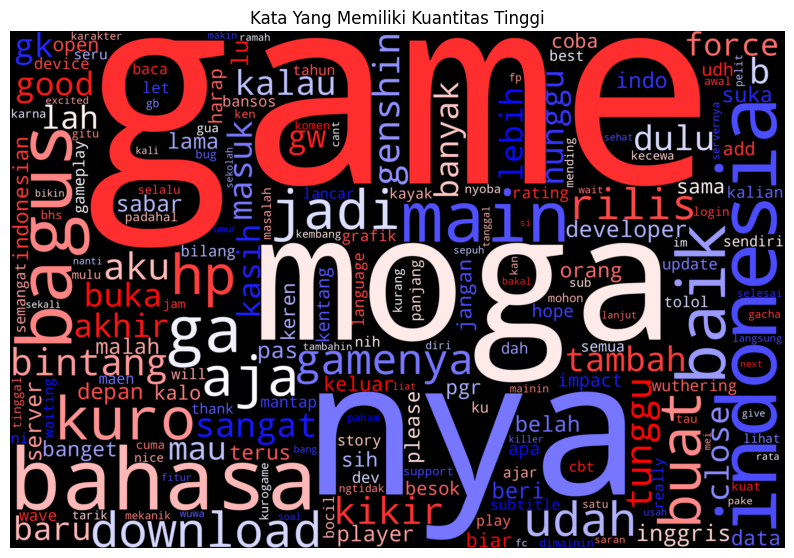

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


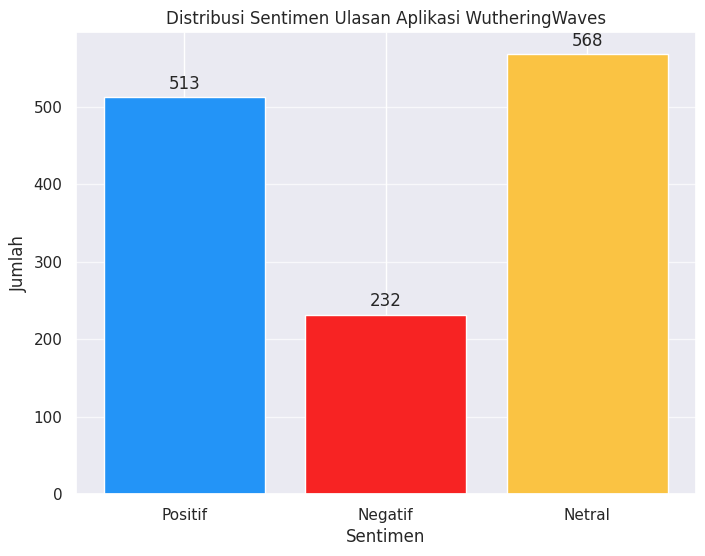

In [37]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi WutheringWaves")


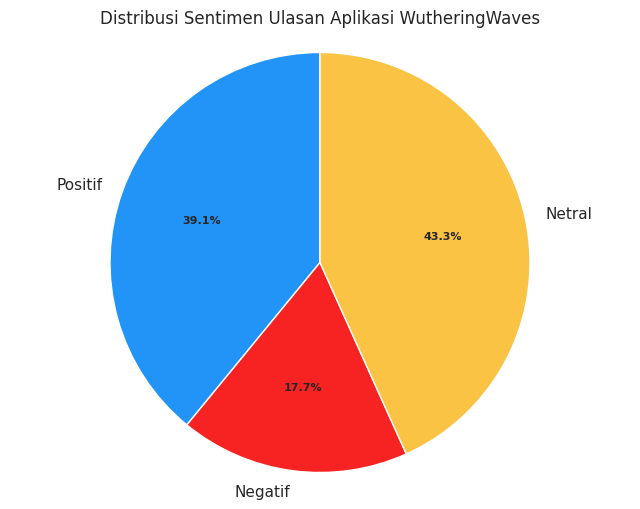

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi WutheringWaves")

In [39]:
data = data.replace({'Positif':0, 'Netral':1, 'Negatif':2})
data

,content,content_en,sentimen
0,wkwkwkw kemarin masuk notiv hahaha,Yesterday's wkwkwkw entered notiv hahaha,0
1,saat,when,1
2,why not support language indonesian your game ...,Why not support language in Indonesia your gam...,0
3,dear developer moga game kikir game belah graf...,Dear developer Moga games. The game file split...,0
4,panjang panjang gem baik,length Gem good length,0
...,...,...,...
1308,moga kecewa,Let's hope you're disappointed.,2
1309,tambah kan bahasa indonesia,add English,1
1310,kalok bosen maendh pensi genshin kesini aja bang,"fontcolor="" # FFFF00""ifbosenmaendhpensi genshi...",1
1311,now force cloce my device bos,now force close my device boss,1


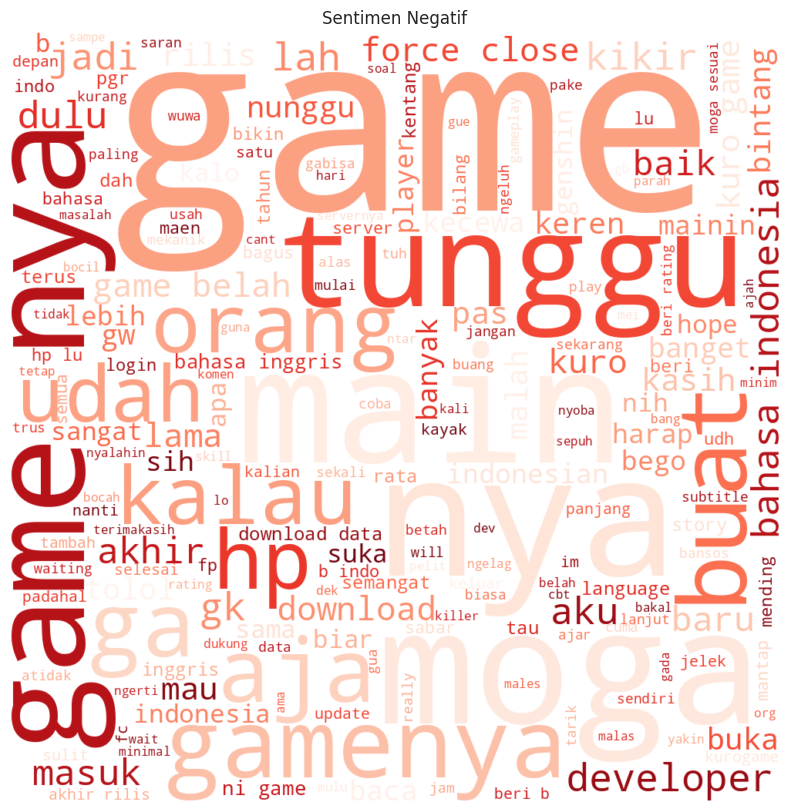

In [40]:
# Visualisasi Wordcould Positif, Negatif, dan Netral

data_positif = data[data['sentimen'] == 0]
data_netral = data[data['sentimen'] == 1]
data_negatif = data[data['sentimen'] == 2]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

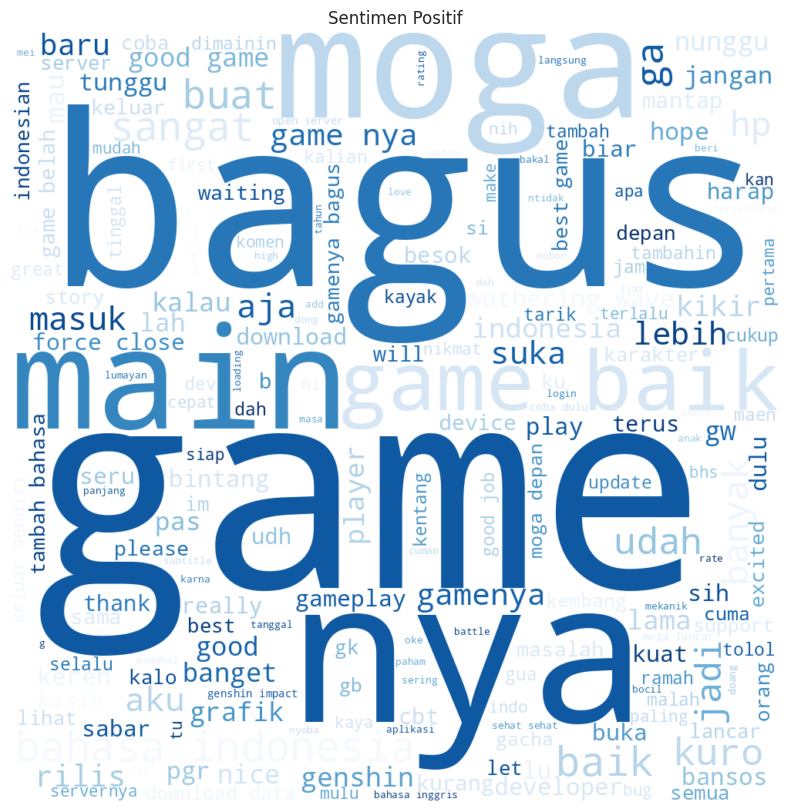

In [41]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

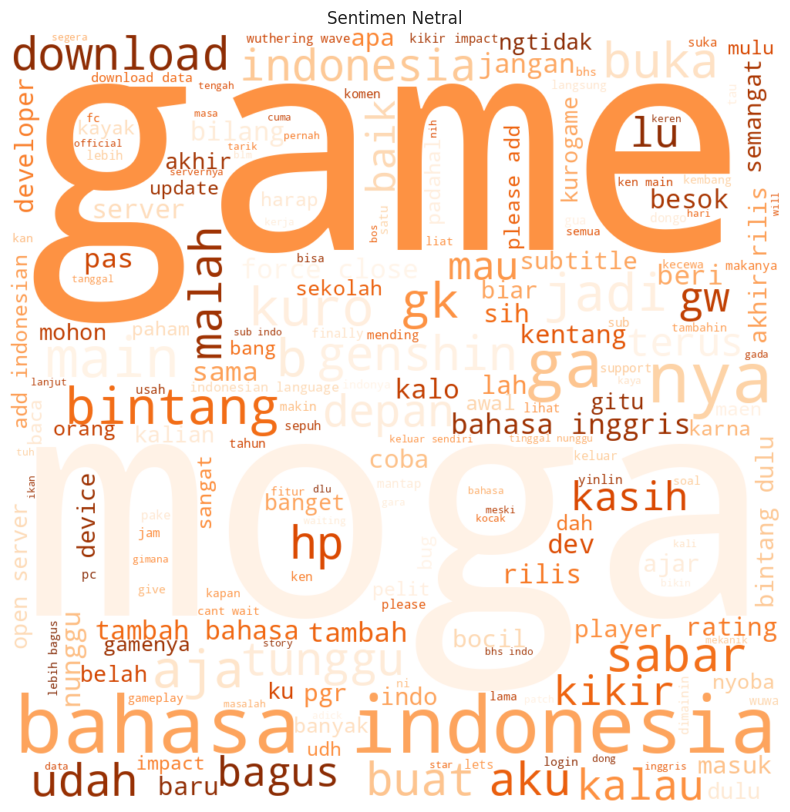

In [42]:
all_words = ' '.join([reviews for reviews in data_netral['content']])
wordcloud = WordCloud(colormap='Oranges', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Netral")
plt.margins(x=0, y=0)
plt.show()

In [43]:
# Menghitung Jumlah Sentimen Positif, Netral, Negatif
data['sentimen'].value_counts()

sentimen
1    568
0    513
2    232
Name: count, dtype: int64

# **Data Preparation**

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [47]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

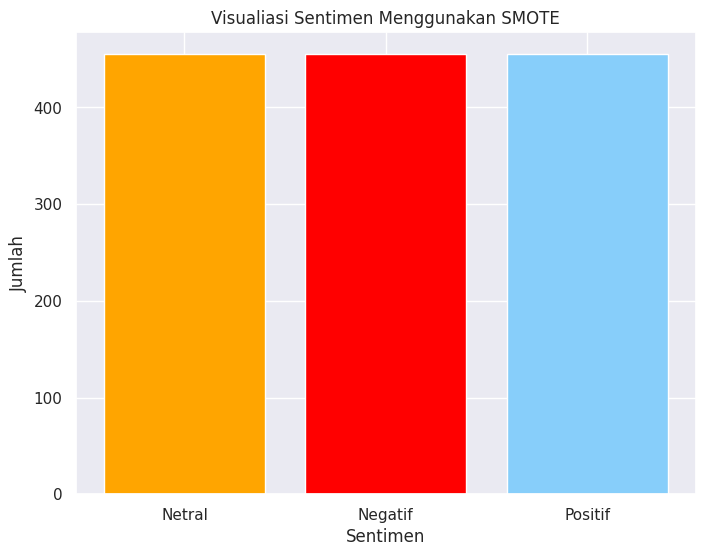

In [48]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue', 'orange'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif', 'Netral'])
plt.show()

# **Modeling**


In [49]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [50]:
y_pred = naive_bayes.predict(X_test_vec)

In [51]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif', 'Netral'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.5779467680608364

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.59      0.61      0.60       102
     Positif       0.68      0.60      0.64       113
      Netral       0.38      0.46      0.42        48

    accuracy                           0.58       263
   macro avg       0.55      0.56      0.55       263
weighted avg       0.59      0.58      0.58       263



In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[62 22 18]
 [27 68 18]
 [16 10 22]]

Accuracy =  0.5779467680608364


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

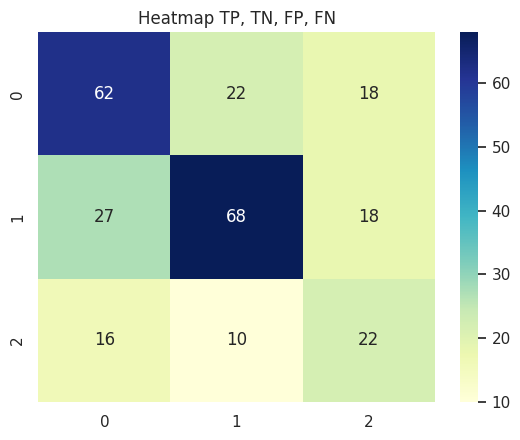

In [53]:
cm_matrix = pd.DataFrame(data=cm, columns=['0', '1', '2'],
                         index=['0', '1', '2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [54]:
# Slicing the confusion matrix
print('\nTrue Positives (TP):', cm[0, 0])
print('False Negatives (FN) for Positive class:', cm[0, 1] + cm[0, 2])
print('False Positives (FP) for Positive class:', cm[1, 0] + cm[2, 0])
print('True Negatives (TN) for Negative class:', cm[1, 1])
print('False Negatives (FN) for Negative class:', cm[1, 2])
print('False Positives (FP) for Negative class:', cm[2, 1])
print('True Negatives (TN) for Neutral class:', cm[2, 2])


True Positives (TP): 62
False Negatives (FN) for Positive class: 40
False Positives (FP) for Positive class: 43
True Negatives (TN) for Negative class: 68
False Negatives (FN) for Negative class: 18
False Positives (FP) for Negative class: 10
True Negatives (TN) for Neutral class: 22


In [55]:
tp = cm[0, 0]
fn_pos = cm[0, 1] + cm[0, 2]
fp_pos = cm[1, 0] + cm[2, 0]
tn_neg = cm[1, 1]
fn_neg = cm[1, 2]
fp_neg = cm[2, 1]
tn_neu = cm[2, 2]

In [56]:
total = tp + fn_pos + fp_pos + tn_neg + fn_neg + fp_neg + tn_neu
correct = tp + tn_neg + tn_neu

In [57]:
# Calculate classification Accuracy
total = tp + fn_pos + fp_pos + tn_neg + fn_neg + fp_neg + tn_neu
correct = tp + tn_neg + tn_neu

classification_accuracy = correct / total
print(f'\nClassification Accuracy: {classification_accuracy:.4f}')


Classification Accuracy: 0.5779


In [58]:
# Calculate Classification Error
total_instances = tp + fn_pos + fp_pos + tn_neg + fn_neg + fp_neg + tn_neu
misclassified_instances = fn_pos + fp_pos + fn_neg + fp_neg

classification_error = misclassified_instances / total_instances
print(f'\nClassification Error: {classification_error:.4f}')


Classification Error: 0.4221


# **Testing**


In [60]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 1:
    sentimen_label = "Netral"
else:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : kecewa bgt sama gamenya
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [62]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 1:
    sentimen_label = "Netral"
else:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : bagus story dan grafiknya
Hasil Analisis Sentimen Untuk Teks Baru : Positif


In [63]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 1:
    sentimen_label = "Netral"
else:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : terkadang suka force close sendiri
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [64]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 1:
    sentimen_label = "Netral"
else:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : udah bagus cuman harus sabar gachanya
Hasil Analisis Sentimen Untuk Teks Baru : Positif


In [65]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 1:
    sentimen_label = "Netral"
else:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : tolong tambah bahasa indonesia
Hasil Analisis Sentimen Untuk Teks Baru : Netral
